<a href="https://colab.research.google.com/github/bfg-9/Gold-prices-prediction-using-ANN/blob/main/StockPricesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,LSTM
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('MSFT.csv')

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400
...,...,...,...,...,...,...,...
9078,2022-03-18,295.369995,301.000000,292.730011,300.429993,300.429993,43317000
9079,2022-03-21,298.890015,300.140015,294.899994,299.160004,299.160004,28351200
9080,2022-03-22,299.799988,305.000000,298.769989,304.059998,304.059998,27599700
9081,2022-03-23,300.510010,303.230011,297.720001,299.489990,299.489990,25715400


In [5]:
df.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
9078,False,False,False,False,False,False,False
9079,False,False,False,False,False,False,False
9080,False,False,False,False,False,False,False
9081,False,False,False,False,False,False,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9083 entries, 0 to 9082
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9083 non-null   object 
 1   Open       9083 non-null   float64
 2   High       9083 non-null   float64
 3   Low        9083 non-null   float64
 4   Close      9083 non-null   float64
 5   Adj Close  9083 non-null   float64
 6   Volume     9083 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 496.9+ KB


In [8]:
df.shape

(9083, 7)

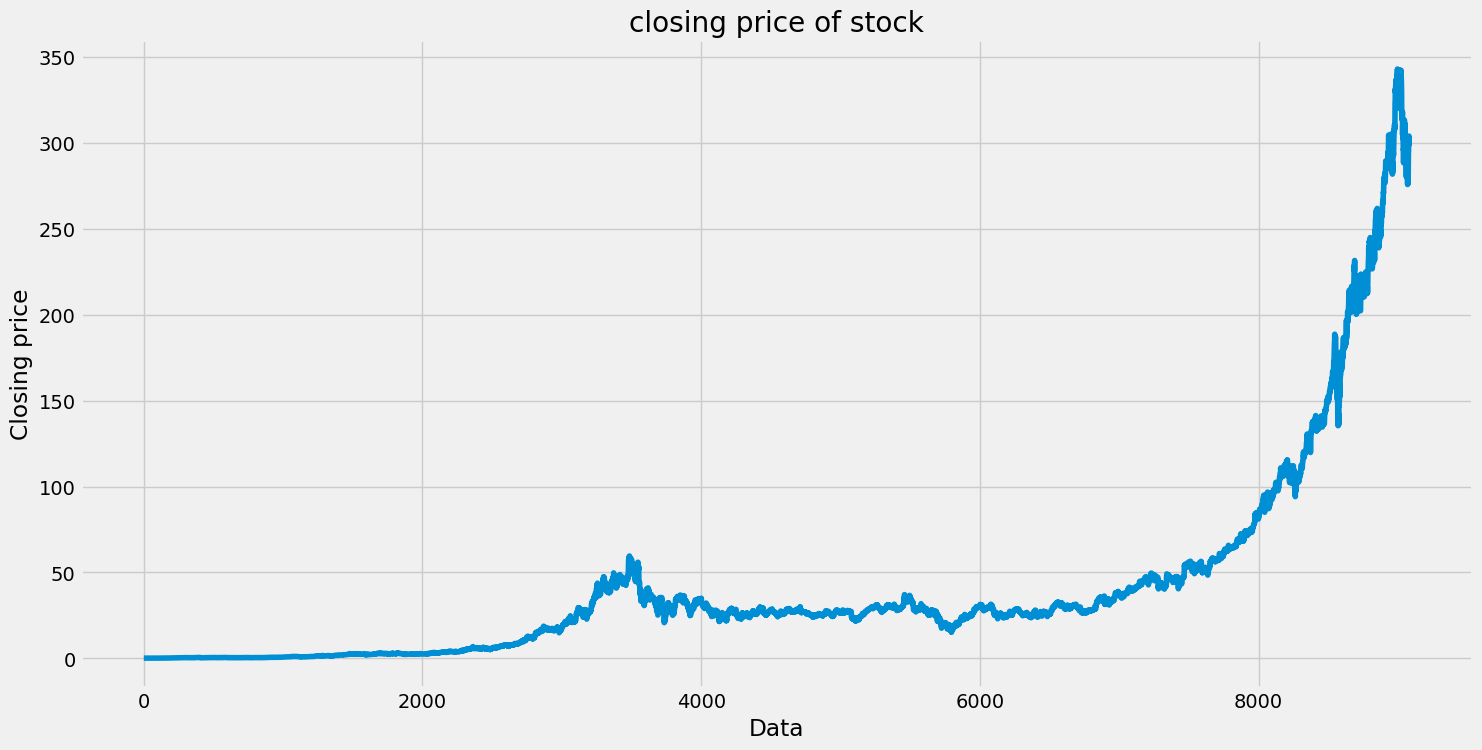

In [9]:
plt.figure(figsize=(16,8))
plt.title('closing price of stock')
plt.plot(df['Close'])
plt.xlabel('Data')
plt.ylabel('Closing price')
plt.show()

In [10]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

7267

In [12]:
scaler=StandardScaler()

scaled_data = scaler.fit_transform(dataset)
print('Mean of processed data:',scaled_data.mean())
print('Standard deviation of processed data:',scaled_data.std())

Mean of processed data: 1.0013153162753806e-16
Standard deviation of processed data: 1.0


In [13]:
train_data = scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i])
  y_train.append(train_data[i])

In [14]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train.shape

(7207, 60, 1)

In [15]:
print("x_train shape before reshaping",x_train.shape)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print("x_train shape after reshaping",x_train.shape)

x_train shape before reshaping (7207, 60, 1)
x_train shape after reshaping (7207, 60, 1)


In [16]:
model = Sequential()
model.add(LSTM(200,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(200,return_sequences = False))
model.add(Dense(100))


In [17]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 200)           161600    
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 100)               20100     
                                                                 
Total params: 502500 (1.92 MB)
Trainable params: 502500 (1.92 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
history = model.fit(x_train,y_train,epochs=5)

Epoch 1/5
226/226 [==============================] - 86s 359ms/step - loss: 0.0052
Epoch 2/5
226/226 [==============================] - 82s 363ms/step - loss: 3.6589e-04
Epoch 3/5
226/226 [==============================] - 88s 391ms/step - loss: 3.5953e-04
Epoch 4/5
226/226 [==============================] - 91s 404ms/step - loss: 2.5680e-04
Epoch 5/5
226/226 [==============================] - 63s 279ms/step - loss: 2.4507e-04


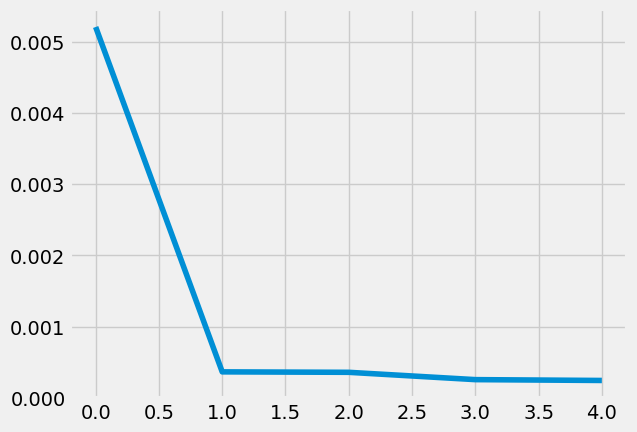

In [19]:
plt.plot(history.history['loss'])

In [20]:
test_data = scaled_data[training_data_len-60:,:]
x_test=[]
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [21]:
x_test = np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [23]:
predictions =model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print(predictions)

57/57 [==============================] - 9s 128ms/step
[[ 46.34415   46.123585  46.05186  ...  46.200653  46.18581   46.217136]
 [ 46.12351   45.906033  45.87468  ...  46.020714  45.983044  46.01129 ]
 [ 45.988094  45.804752  45.81923  ...  45.92618   45.891125  45.918835]
 ...
 [104.901215 153.97948  144.55522  ...  93.30258  143.83739  128.73656 ]
 [104.87932  154.13911  144.97325  ...  93.291275 143.82442  128.83011 ]
 [104.89309  154.30315  145.36627  ...  93.29038  143.86433  128.95552 ]]
